# Copyright Netherlands eScience Center <br>
** Function     : AMET from coordinated EC-Earth experiment 2 ** <br>
** Author       : Yang Liu ** <br>
** First Built  : 2018.10.16 ** <br>
** Last Update  : 2018.11.19 ** <br>
Description  : This script serves to check the AMET calculated from coordinated EC-Earth experiment 2. It includes 10 members in total. <br>
Return Values : jpeg <br>
Caveat! : The time series spans from 1979 to 2015 (37 years)

In [1]:
%matplotlib inline

import sys
sys.path.append("/home/yang/NLeSC/Computation_Modeling/Bjerknes/Scripts/META")
import numpy as np
import scipy
from netCDF4 import Dataset
import matplotlib
import matplotlib.pyplot as plt
import os
import meta.statistics
import meta.visualizer
from scipy import stats

In [2]:
# constants
constant = {'g' : 9.80616,      # gravititional acceleration [m / s2]
            'R' : 6371009,      # radius of the earth [m]
            'cp': 1004.64,      # heat capacity of air [J/(Kg*K)]
            'Lv': 2264670,      # Latent heat of vaporization [J/Kg]
            'R_dry' : 286.9,    # gas constant of dry air [J/(kg*K)]
            'R_vap' : 461.5,    # gas constant for water vapour [J/(kg*K)]
            'HoF' : 334,        # heat of fusion of ice [KJ/Kg] 
            'rho_ice' : 0.91    # density of sea ice [g/cm3]
            }

In [4]:
if __name__=="__main__":
    # sample
    ################################   Input zone  ######################################
    # specify data path
    datapath_exp1 = '/mnt/Associate/Core_Database_ECE/EC-earth_coordExp/Exp1'
    datapath_exp2 = '/mnt/Associate/Core_Database_ECE/EC-earth_coordExp/Exp2'
    output_path = '/home/yang/NLeSC/Computation_Modeling/Bjerknes/EC-Earth'
    #####################################################################################
    #####################################################################################
    print ('*********************** extract variables *************************')
    # get the basic dimensions
    benchmark_dataset = Dataset(os.path.join(datapath_exp2, '4RXF', 'postprocessing',
                                'AMET_EC-earth_model_daily_4RXF_1979_2015_E_zonal_int.nc'))
    latitude = benchmark_dataset.variables['latitude'][:]
    year = benchmark_dataset.variables['year'][:]
    Dim_lat = 512
    Dim_lon = 1024
    # extract data from exp2
    namelist_exp2 = ['4RXF', '5DEH', 'ITNV']
    AMET_zonal_exp2 = {'4RXF' : np.zeros((len(year), 12, Dim_lat), dtype=float),
                       '5DEH' : np.zeros((len(year), 12, Dim_lat), dtype=float), 
                       'ITNV' : np.zeros((len(year), 12, Dim_lat), dtype=float),}
    for c in namelist_exp2:
        dataset_ECE = Dataset(os.path.join(datapath_exp2, c, 'postprocessing',
                              'AMET_EC-earth_model_daily_{}_1979_2015_E_zonal_int.nc'.format(c)))
        AMET_ECE_zonal = dataset_ECE.variables['E'][:]/1000
        AMET_zonal_exp2['{}'.format(c)][:] = AMET_ECE_zonal[:]
    # extract data from exp1
    namelist_exp1 = ['ph02']
    AMET_zonal_exp1 = {'ph02' : np.zeros((len(year), 12, Dim_lat), dtype=float)}
    for c in namelist_exp1:
        dataset_ECE = Dataset(os.path.join(datapath_exp1, c, 'postprocessing',
                              'AMET_EC-earth_model_daily_{}_1979_2015_E_zonal_int.nc'.format(c)))
        AMET_ECE_zonal = dataset_ECE.variables['E'][:]/1000
        AMET_zonal_exp1['{}'.format(c)][:] = AMET_ECE_zonal[:]        

*********************** extract variables *************************


In [5]:
    print (latitude[85])
    # make time series of the AMET from each member

59.88288


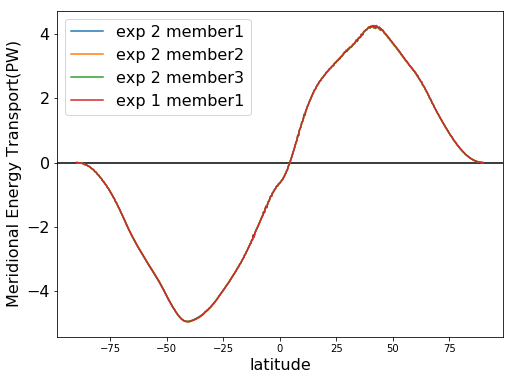

In [8]:
    ##########################  mean AMET at different lat  ############################
    fig1 = plt.figure()
    fig1.set_size_inches(8, 6)
    plt.axhline(y=0, color='k',ls='-')
    for c in np.arange(len(namelist_exp2)):
        AMET_mean = np.mean(np.mean(AMET_zonal_exp2['{}'.format(namelist_exp2[c])][:],0),0)
        plt.plot(latitude, AMET_mean, linewidth=1.5, label='exp 2 member{}'.format(c+1))
    for c in np.arange(len(namelist_exp1)):
        AMET_mean = np.mean(np.mean(AMET_zonal_exp1['{}'.format(namelist_exp1[c])][:],0),0)
        plt.plot(latitude, AMET_mean, linewidth=1.5, label='exp 1 member{}'.format(c+1))    
    plt.xlabel("latitude",fontsize=16)
    plt.ylabel("Meridional Energy Transport(PW)",fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(frameon=True, loc=2, prop={'size': 16})
    plt.show()
    fig1.savefig(os.path.join(output_path,'AMET_mean.png'),dpi=300)
    plt.close(fig1)  

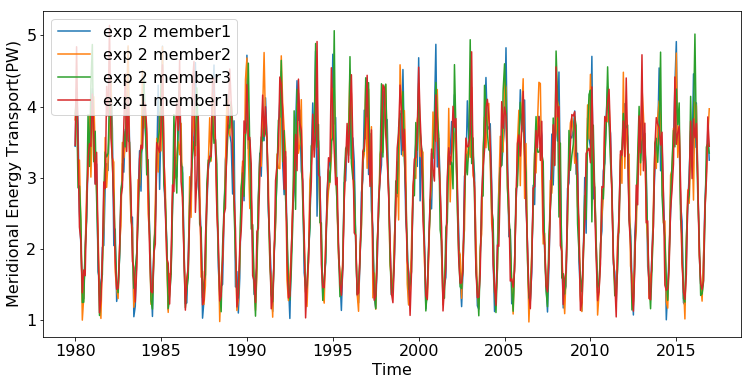

In [10]:
    ##########################  time series of AMET at 60N  ############################
    index_year = np.arange(1980,year[-1]+1,5)
    index = np.arange(1,len(year)*12+1,1) # 1979 - 2015
    
    fig2 = plt.figure()
    fig2.set_size_inches(12.5, 6) 
    for c in np.arange(len(namelist_exp2)):
        AMET_60N = AMET_zonal_exp2['{}'.format(namelist_exp2[c])][:].reshape(len(year)*12,Dim_lat)
        plt.plot(index, AMET_60N[:,85], linewidth=1.5, label='exp 2 member{}'.format(c+1))
    for c in np.arange(len(namelist_exp1)):
        AMET_60N = AMET_zonal_exp1['{}'.format(namelist_exp1[c])][:].reshape(len(year)*12,Dim_lat)
        plt.plot(index, AMET_60N[:,85], linewidth=1.5, label='exp 1 member{}'.format(c+1))    
    plt.xlabel("Time",fontsize=16)
    plt.xticks(np.arange(1,len(year)*12+1,60), index_year,fontsize=16)
    plt.ylabel("Meridional Energy Transport(PW)",fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(frameon=True, loc=2, prop={'size': 16})
    plt.show()
    fig2.savefig(os.path.join(output_path,'AMET_60N.png'),dpi=300)
    plt.close(fig2)    

The input data has the dimension of month.
The output anomaly time series only contains one dimension for time!
The input data has the dimension of month.
The output anomaly time series only contains one dimension for time!
The input data has the dimension of month.
The output anomaly time series only contains one dimension for time!
The input data has the dimension of month.
The output anomaly time series only contains one dimension for time!


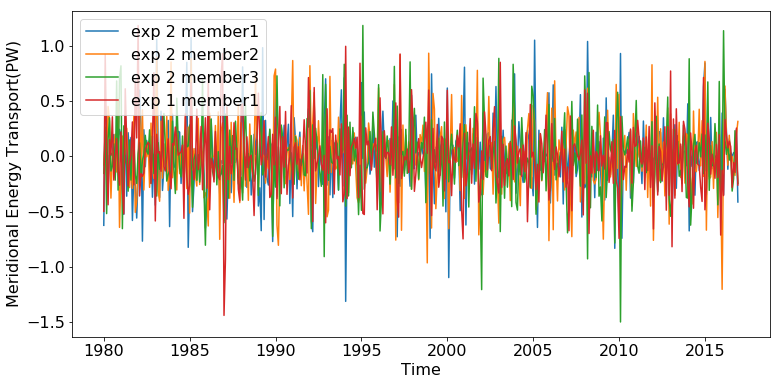

In [11]:
    #######################  time series of AMET anomalies at 60N  #########################
    index_year = np.arange(1980,year[-1]+1,5)
    index = np.arange(1,len(year)*12+1,1) # 1979 - 2015
    
    fig3 = plt.figure()
    fig3.set_size_inches(12.5, 6) 
    for c in np.arange(len(namelist_exp2)):
        AMET_matrix = AMET_zonal_exp2['{}'.format(namelist_exp2[c])][:]
        stat_AMET = meta.statistics.operator(AMET_matrix)
        stat_AMET.anomaly()
        #stat_AMET.lowpass(window=12)
        plt.plot(index[:], stat_AMET._anomaly[:,85], linewidth=1.5, label='exp 2 member{}'.format(c+1))
    for c in np.arange(len(namelist_exp1)):
        AMET_matrix = AMET_zonal_exp1['{}'.format(namelist_exp1[c])][:]
        stat_AMET = meta.statistics.operator(AMET_matrix)
        stat_AMET.anomaly()
        #stat_AMET.lowpass(window=12)
        plt.plot(index[:], stat_AMET._anomaly[:,85], linewidth=1.5, label='exp 1 member{}'.format(c+1))
    plt.xlabel("Time",fontsize=16)
    plt.xticks(np.arange(1,len(year)*12+1,60), index_year,fontsize=16)
    plt.ylabel("Meridional Energy Transport(PW)",fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(frameon=True, loc=2, prop={'size': 16})
    plt.show()
    fig3.savefig(os.path.join(output_path,'AMET_anomaly_60N.png'),dpi=300)
    plt.close(fig3)       

The input data has the dimension of month.
The output anomaly time series only contains one dimension for time!
The input data has the dimension of month.
The output anomaly time series only contains one dimension for time!
The input data has the dimension of month.
The output anomaly time series only contains one dimension for time!
The input data has the dimension of month.
The output anomaly time series only contains one dimension for time!


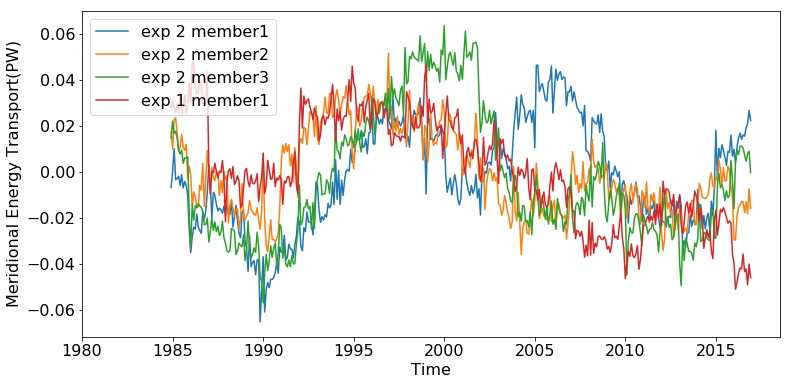

In [12]:
    #######################  time series of AMET anomalies at 60N  #########################
    index_year = np.arange(1980,year[-1]+1,5)
    index = np.arange(1,len(year)*12+1,1) # 1979 - 2015
    
    fig4 = plt.figure()
    fig4.set_size_inches(12.5, 6) 
    for c in np.arange(len(namelist_exp2)):
        AMET_matrix = AMET_zonal_exp2['{}'.format(namelist_exp2[c])][:]
        stat_AMET = meta.statistics.operator(AMET_matrix)
        stat_AMET.anomaly()
        stat_AMET.lowpass(window=60)
        plt.plot(index[59:], stat_AMET._lowpass[:,85], linewidth=1.5, label='exp 2 member{}'.format(c+1))
    for c in np.arange(len(namelist_exp1)):
        AMET_matrix = AMET_zonal_exp1['{}'.format(namelist_exp1[c])][:]
        stat_AMET = meta.statistics.operator(AMET_matrix)
        stat_AMET.anomaly()
        stat_AMET.lowpass(window=60)
        plt.plot(index[59:], stat_AMET._lowpass[:,85], linewidth=1.5, label='exp 1 member{}'.format(c+1))
    plt.xlabel("Time",fontsize=16)
    plt.xticks(np.arange(1,len(year)*12+1,60), index_year,fontsize=16)
    plt.ylabel("Meridional Energy Transport(PW)",fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(frameon=True, loc=2, prop={'size': 16})
    plt.show()
    fig4.savefig(os.path.join(output_path,'AMET_anomaly_60N_lowpass_5yr.png'),dpi=300)
    plt.close(fig4)

In [59]:
    print(AMET_zonal['ITNV'].reshape(len(year)*12,Dim_lat)[:,85])

[3.89846045 4.1467079  2.85988425 2.88533016 2.40807324 1.25045611
 1.25499747 1.96765885 2.38692262 3.88383711 3.16004568 4.29106411
 4.87210292 3.2269272  3.65448    2.6926989  1.98591297 1.06765739
 1.49138549 1.63986077 2.7516913  3.36323282 3.29419717 3.34531316
 4.07451136 4.00462452 3.18374542 2.69352935 2.07691845 1.5739976
 1.38844294 1.87462992 2.84233591 2.95869995 3.65040891 3.43536788
 4.06419983 3.52167664 3.50172733 2.61271596 1.9846339  1.45060801
 1.73062583 1.94046991 2.37847049 3.03856687 3.33567854 3.42985635
 4.37114883 3.76949973 3.04196976 3.25590851 2.2031365  1.27364419
 1.15669236 2.03850208 2.32437866 3.43957687 3.55073421 3.68460704
 4.3365696  3.8251066  2.91664822 2.70319322 2.08192466 1.16697875
 1.35819233 1.62154744 2.52398641 3.88790688 3.18661399 2.78620164
 3.95767319 4.40876369 3.24797693 3.06600568 1.92514043 1.17713993
 1.43738257 1.59647752 2.6449043  3.01968928 3.30633643 3.50704426
 3.45221528 4.26403124 3.57097651 2.35025298 2.29707827 1.31803